<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_1_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,30.978099,46.273858,0.066117,87.318074,87.265069,0.053005
1,0.0,1.0,26.389597,50.883814,0.117723,87.391135,87.283403,0.107732
2,0.0,2.0,35.197930,30.008209,-0.042545,75.163594,75.223356,-0.059763
3,0.0,3.0,95.063308,79.558327,0.022847,184.644482,184.668311,-0.023829
4,0.0,4.0,62.723163,82.764765,-0.000601,155.487326,155.515612,-0.028286
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,91.811947,35.648800,0.193159,137.653907,137.483712,0.170195
29996,999.0,26.0,59.690176,54.384176,-0.080277,123.994076,124.094596,-0.100521
29997,999.0,27.0,38.732129,68.162660,0.009808,116.904598,116.914210,-0.009613
29998,999.0,28.0,68.683839,59.854982,0.013138,138.551959,138.566389,-0.014430


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    30.978099  46.273858  0.066117   87.318074   87.265069  0.053005
      1.0    26.389597  50.883814  0.117723   87.391135   87.283403  0.107732
      2.0    35.197930  30.008209 -0.042545   75.163594   75.223356 -0.059763
      3.0    95.063308  79.558327  0.022847  184.644482  184.668311 -0.023829
      4.0    62.723163  82.764765 -0.000601  155.487326  155.515612 -0.028286
...                ...        ...       ...         ...         ...       ...
999.0 25.0   91.811947  35.648800  0.193159  137.653907  137.483712  0.170195
      26.0   59.690176  54.384176 -0.080277  123.994076  124.094596 -0.100521
      27.0   38.732129  68.162660  0.009808  116.904598  116.914210 -0.009613
      28.0   68.683839  59.854982  0.013138  138.551959  138.566389 -0.014430
      29.0   92.023358  52.204389  0.010982  154.238729  154.260942 -0.022214

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    30.978099  46.273858  0.066117   87.318074   87.265069  0.053005
      1.0    26.389597  50.883814  0.117723   87.391135   87.283403  0.107732
      2.0    35.197930  30.008209 -0.042545   75.163594   75.223356 -0.059763
      3.0    95.063308  79.558327  0.022847  184.644482  184.668311 -0.023829
      4.0    62.723163  82.764765 -0.000601  155.487326  155.515612 -0.028286
...                ...        ...       ...         ...         ...       ...
999.0 25.0   91.811947  35.648800  0.193159  137.653907  137.483712  0.170195
      26.0   59.690176  54.384176 -0.080277  123.994076  124.094596 -0.100521
      27.0   38.732129  68.162660  0.009808  116.904598  116.914210 -0.009613
      28.0   68.683839  59.854982  0.013138  138.551959  138.566389 -0.014430
      29.0   92.023358  52.204389  0.010982  154.238729  154.260942 -0.022214

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,30.978099,46.273858,0.066117,87.318074,87.265069,0.053005
1,0.0,1.0,26.389597,50.883814,0.117723,87.391135,87.283403,0.107732
2,0.0,2.0,35.197930,30.008209,-0.042545,75.163594,75.223356,-0.059763
3,0.0,3.0,95.063308,79.558327,0.022847,184.644482,184.668311,-0.023829
4,0.0,4.0,62.723163,82.764765,-0.000601,155.487326,155.515612,-0.028286
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,91.811947,35.648800,0.193159,137.653907,137.483712,0.170195
29996,999.0,26.0,59.690176,54.384176,-0.080277,123.994076,124.094596,-0.100521
29997,999.0,27.0,38.732129,68.162660,0.009808,116.904598,116.914210,-0.009613
29998,999.0,28.0,68.683839,59.854982,0.013138,138.551959,138.566389,-0.014430


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    30.978099  46.273858  0.066117   87.318074   87.265069  0.053005
      1.0    26.389597  50.883814  0.117723   87.391135   87.283403  0.107732
      2.0    35.197930  30.008209 -0.042545   75.163594   75.223356 -0.059763
      3.0    95.063308  79.558327  0.022847  184.644482  184.668311 -0.023829
      4.0    62.723163  82.764765 -0.000601  155.487326  155.515612 -0.028286
...                ...        ...       ...         ...         ...       ...
999.0 25.0   91.811947  35.648800  0.193159  137.653907  137.483712  0.170195
      26.0   59.690176  54.384176 -0.080277  123.994076  124.094596 -0.100521
      27.0   38.732129  68.162660  0.009808  116.904598  116.914210 -0.009613
      28.0   68.683839  59.854982  0.013138  138.551959  138.566389 -0.014430
      29.0   92.023358  52.204389  0.010982  154.238729  154.260942 -0.022214

[30000 rows x 6 columns]

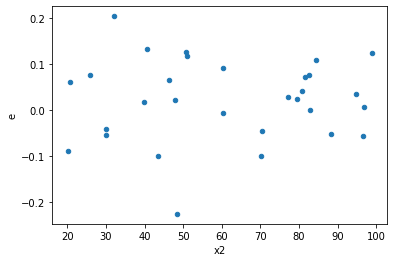

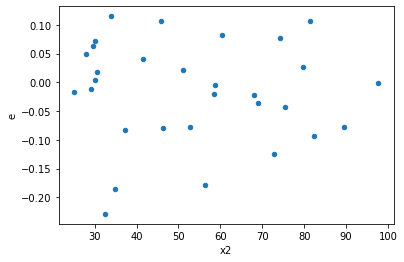

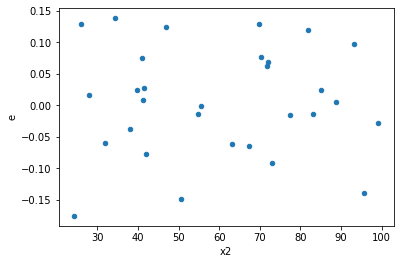

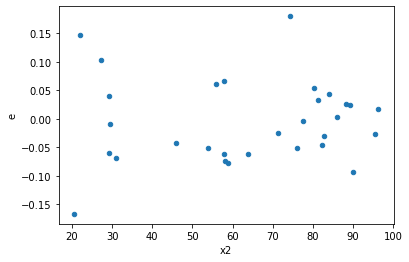

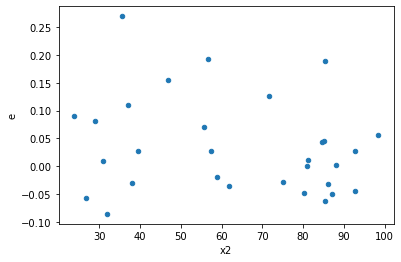

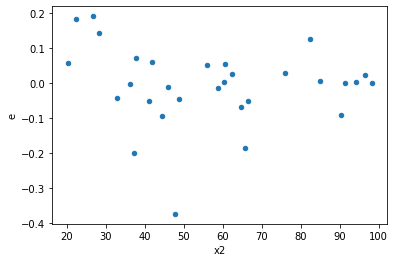

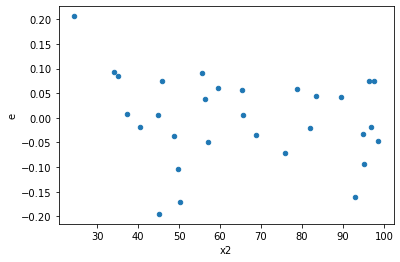

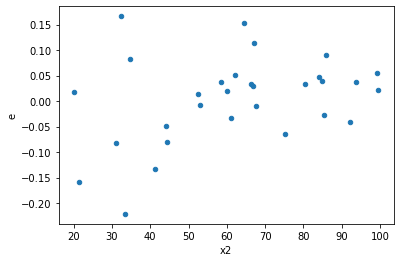

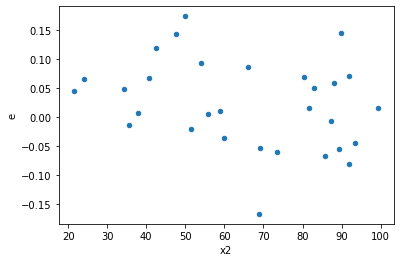

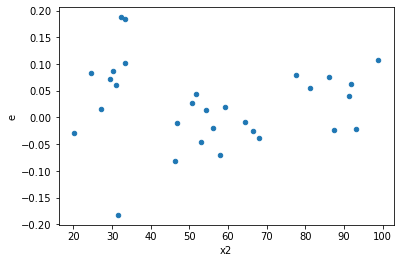

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,21.0,5.0,0.09708797540899763,0.0685807990866704,0.004623236924237982,0.013716159817334081,2.9667871325012887,0.2306066671995599,0.88469666640022,0.11530333359977996,Reject005=1 : Homoscedasticity
5.0,11.0,15.0,0.06910987104245116,0.20754834308271258,0.0062827155493137415,0.013836556205514172,2.2023209704322095,0.15595967825265022,0.9220201608736749,0.07797983912632511,Reject005=1 : Homoscedasticity
7.0,19.0,7.0,0.10169131820412003,0.07180157476705348,0.0053521746423221064,0.010257367823864784,1.9164860097716279,0.3857405652675032,0.8071297173662484,0.1928702826337516,Reject005=1 : Homoscedasticity
11.0,8.0,18.0,0.03020187860045476,0.10851873384175258,0.003775234825056845,0.006028818546764032,1.5969386875618403,0.3891645469192211,0.8054177265403895,0.19458227345961054,Reject005=1 : Homoscedasticity
13.0,11.0,15.0,0.061019801532557344,0.3166086838344021,0.005547254684777941,0.02110724558896014,3.804989456655004,0.018278604759290218,0.9908606976203549,0.009139302379645109,Reject005=0 : Heteroscedasticity
15.0,12.0,14.0,0.045074446707359835,0.17513260306334288,0.003756203892279986,0.012509471647381634,3.3303494714682498,0.03507701156933152,0.9824614942153342,0.01753850578466576,Reject005=0 : Heteroscedasticity
17.0,16.0,10.0,0.08847951288036514,0.10001605144960529,0.005529969555022821,0.01000160514496053,1.8086184825151819,0.34408125492145625,0.8279593725392719,0.17204062746072812,Reject005=1 : Homoscedasticity
18.0,14.0,12.0,0.04575459634170009,0.11123938509156639,0.003268185452978578,0.009269948757630533,2.836420665535376,0.07785222516414625,0.9610738874179269,0.038926112582073125,Reject005=1 : Homoscedasticity
23.0,16.0,10.0,0.07753894820533386,0.07765248390291651,0.004846184262833366,0.007765248390291651,1.602342785404455,0.4538219632239655,0.7730890183880172,0.22691098161198275,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,14.0,12.0,0.16429540333832654,0.03341749221497375,0.01173538595273761,0.002784791017914479,0.2372986307506016,0.012576904553584501,Reject005=0 : Heteroscedasticity
1.0,15.0,11.0,0.1474142332020346,0.03424764697893482,0.009827615546802306,0.003113422452630438,0.3168034441114741,0.041080081253120945,Reject005=0 : Heteroscedasticity
2.0,14.0,12.0,0.12537597934873757,0.03637028285254796,0.008955427096338398,0.0030308569043789968,0.33843800767673293,0.05661044783679538,Reject005=1 : Homoscedasticity
3.0,18.0,8.0,0.13426793261229447,0.01691430941432933,0.007459329589571915,0.0021142886767911663,0.28344218490451545,0.025048691055629256,Reject005=0 : Heteroscedasticity
4.0,21.0,5.0,0.09708797540899763,0.0685807990866704,0.004623236924237982,0.013716159817334081,2.9667871325012887,0.2306066671995599,Reject005=1 : Homoscedasticity
5.0,11.0,15.0,0.06910987104245116,0.20754834308271258,0.0062827155493137415,0.013836556205514172,2.2023209704322095,0.15595967825265022,Reject005=1 : Homoscedasticity
6.0,9.0,17.0,0.12476263149894967,0.08707961935408326,0.013862514610994407,0.0051223305502401915,0.3695094789063489,0.13138004716477414,Reject005=1 : Homoscedasticity
7.0,19.0,7.0,0.10169131820412003,0.07180157476705348,0.0053521746423221064,0.010257367823864784,1.9164860097716279,0.3857405652675032,Reject005=1 : Homoscedasticity
8.0,11.0,15.0,0.06111990421560056,0.07019363354694004,0.00555635492869096,0.004679575569796003,0.8422024204451747,0.7875716339422801,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      788
Reject005=0 : Heteroscedasticity    212
Name: Result_test, dtype: int64